# Logistic Regression - Flight Delay Cause Prediction

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

## Data Cleaning

In [ ]:
# read data and check the data with head()
plane_df = pd.read_csv('2018.csv')
plane_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#determine columns with missing values
sum_missing_values = plane_df.isna().sum()
print(sum_missing_values)

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE      7096862
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY          5860736
WEATHER_DELAY          5860736
NAS_DELAY              5860736
SECURITY_DELAY         5860736
LATE_AIRCRAFT_DELAY    5860736
Unnamed: 27            7213446
dtype: int64


In [ ]:
#Drop unnamed column and check that it is gone
plane_df = plane_df.drop(columns=['Unnamed: 27'])
plane_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 27 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [ ]:
#replace missing duration values with 0

missing_duration_cols = ['DEP_DELAY', 'DEP_TIME', 'WHEELS_OFF', 'ARR_TIME', 'CANCELLATION_CODE', 'WHEELS_ON', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

for col in missing_duration_cols:
    plane_df[col].fillna(0, inplace=True)

In [ ]:
#Checks no missing values

check_duration_na_fix = plane_df.isna().sum()
print(check_duration_na_fix)

FL_DATE                0
OP_CARRIER             0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
CANCELLATION_CODE      0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
dtype: int64


In [ ]:
#update fl_date to date type

plane_df['FL_DATE']=pd.to_datetime(plane_df['FL_DATE'])

plane_df['FL_DATE']

0         2018-01-01
1         2018-01-01
2         2018-01-01
3         2018-01-01
4         2018-01-01
             ...    
7213441   2018-12-31
7213442   2018-12-31
7213443   2018-12-31
7213444   2018-12-31
7213445   2018-12-31
Name: FL_DATE, Length: 7213446, dtype: datetime64[ns]

## Flight Delay Cause Prediction Model

Flight delays are unavoidable aspects of air travel that can have wide-ranging effects on air travel all over the world. This classification focuses on a multi-cause classification of flight delays including weather delay, carrier delay and NAS delay (air traffic). It aims to further analyze flight delay causes and patterns such locations and flight routes that are most associated with delays.

## Logistic Regression

The logistic regression analysis was conducted to understand the impact of certain factors on flight delays caused by carriers. The data was preprocessed to classify flights into delayed and not delayed. We sampled a random subset of 100,000 records for equal samples of delayed and undelayed flights to balance the dataset.

The features included in the model were the operating carrier, origin and destination airports. These features were encoded and scaled appropriately to ensure model accuracy. The logisitc regression model was then trained on 80% of the data and tested on the remaining 20%. The models performance was assessed using accuracy, confusion matrix, and classification report metrics.

### Weather Delay

In [ ]:
#Logistic Regression for WEATHER DELAY:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

plane_df['WEATHER_DELAY'] = plane_df['WEATHER_DELAY'].apply(lambda x: 1 if (x != '' and float(x) > 0) else 0)

#Randomly sample 100000 rows
plane_df_subset2 = plane_df.sample(n=100000, random_state=42)

undelayed_flights = plane_df_subset2[plane_df_subset2['WEATHER_DELAY'] == 0].sample(n=10000, random_state=42)
delayed_flights = plane_df_subset2[plane_df_subset2['WEATHER_DELAY'] == 1].sample(n=10000, replace = True, random_state=42)

plane_df_subset = pd.concat([undelayed_flights, delayed_flights])

# Feature matrix
features_to_include = ['OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE']
X = plane_df_subset[features_to_include]

# Target matrix
y = plane_df_subset[['WEATHER_DELAY']]

categorical_cols = ['OP_CARRIER', 'ORIGIN', 'DEST']

# Encode categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scaling numerical features
from sklearn.preprocessing import StandardScaler

# Specify numerical columns
numerical_cols = ['CRS_DEP_TIME',  'CRS_ARR_TIME', 'DISTANCE']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features and replace them in X
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Fit logistic Regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

C:\Users\kperc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7125
Confusion Matrix:
[[1356  663]
 [ 487 1494]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      2019
           1       0.69      0.75      0.72      1981

    accuracy                           0.71      4000
   macro avg       0.71      0.71      0.71      4000
weighted avg       0.71      0.71      0.71      4000



### Analysis

- Model correctly predicts weather delays (TP and TN) 71% of the time.
- True negatives (correctly predicted no delay): 1,356
- False positives (predicted delay when there was none): 663
- False negatives (predicted no delay when there was one): 487
- True positives (correctly predicted delay): 1,494
- Precision for class '0' (no delay) is higher than for class '1' (delay). This indicates that the model is slightly better at predicting flights that won't be delayed.
- Recall for class '1' is higher than for class '0'. The model is reasonably good at identifying actual delayed flights, but includes more false positives.
- The F1-score is a balance between precision and recall. This indicates that the model doesn't heavily favor the performance of one class over the other.

### Feature Importance Plot for Weather Delay

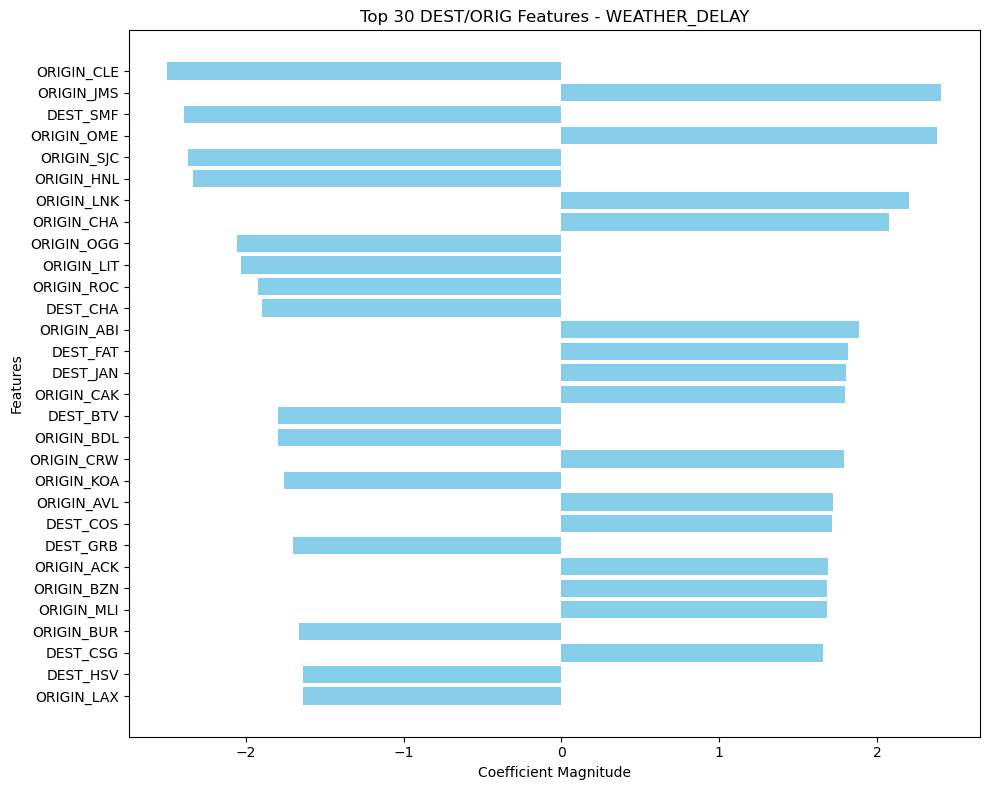

In [ ]:
import matplotlib.pyplot as plt

# Get feature names and coefficients
feature_names = X.columns
coefficients = model.coef_[0]

# Create a DataFrame for better manipulation
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])

# Filter features that start with "DEST" or "ORIG"
dest_orig_features = feature_importance_df[feature_importance_df['Feature'].str.startswith(('DEST', 'ORIG'))]

# Sort features by absolute coefficient value
dest_orig_features = dest_orig_features.sort_values(by='Abs_Coefficient', ascending=False)

# Select only the top 30 features
top_30_dest_orig_features = dest_orig_features.head(30)

# Truncate feature names for better display
truncated_feature_names = [name[:20] + '...' if len(name) > 20 else name for name in top_30_dest_orig_features['Feature']]

# Create the plot
plt.figure(figsize=(10, 8))
plt.barh(truncated_feature_names, top_30_dest_orig_features['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Top 30 DEST/ORIG Features - WEATHER_DELAY')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


The feature importance plot displays the top 30 features in terms of their assosciation with weather delays. Coefficient magnitidues indicate the relative importance of each feature. Positive coefficients contribute towards a prediction of weather delay whereas negative coefficients contribute towards predicting there will be no weather delay. Airplanes departing from Cleveland Hopkins International Airport are least likely to face weather delay while airplane leaving from Jamestown Regional Airport are most likely to face weather delay.

### Carrier Delay

In [ ]:
#Logistic Regression for CARRIER DELAY:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

plane_df['CARRIER_DELAY'] = plane_df['CARRIER_DELAY'].apply(lambda x: 1 if (x != '' and float(x) > 0) else 0)

#Randomly sample 100000 rows
plane_df_subset2 = plane_df.sample(n=100000, random_state=42)

undelayed_flights = plane_df_subset2[plane_df_subset2['CARRIER_DELAY'] == 0].sample(n=10000, random_state=42)
delayed_flights = plane_df_subset2[plane_df_subset2['CARRIER_DELAY'] == 1].sample(n=10000, replace = True, random_state=42)

plane_df_subset = pd.concat([undelayed_flights, delayed_flights])

# Feature matrix
features_to_include = ['OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE']
X = plane_df_subset[features_to_include]

# Target matrix
y = plane_df_subset[['CARRIER_DELAY']]

categorical_cols = ['OP_CARRIER', 'ORIGIN', 'DEST']

# Encode categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scaling numerical features
from sklearn.preprocessing import StandardScaler

# Specify numerical columns
numerical_cols = ['CRS_DEP_TIME',  'CRS_ARR_TIME', 'DISTANCE']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features and replace them in X
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Fit logistic Regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

C:\Users\kperc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.61525
Confusion Matrix:
[[1230  789]
 [ 750 1231]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.61      0.62      2019
           1       0.61      0.62      0.62      1981

    accuracy                           0.62      4000
   macro avg       0.62      0.62      0.62      4000
weighted avg       0.62      0.62      0.62      4000



### Analysis

- Model correctly predicts carrier delays (TP and TN) 62% of the time.
- True negatives (correctly predicted no delay): 1,230
- False positives (predicted delay when there was none): 789
- False negatives (predicted no delay when there was one): 750
- True positives (correctly predicted delay): 1231
- Precision is about 0.61 for both classes, indicating the model is correct about 61% of the time whether it is predicting delay or no delay.
- Recall for both classes is also balanced around 0.61-0.62. The model is equally good at identifying all actual delayed flights as it is in identifying flights that are not delayed.
- The F1-score is the harmonic mean of precision and recall, and indicates balanced performance of both.

### Feature Importance Plot for Carrier Delay

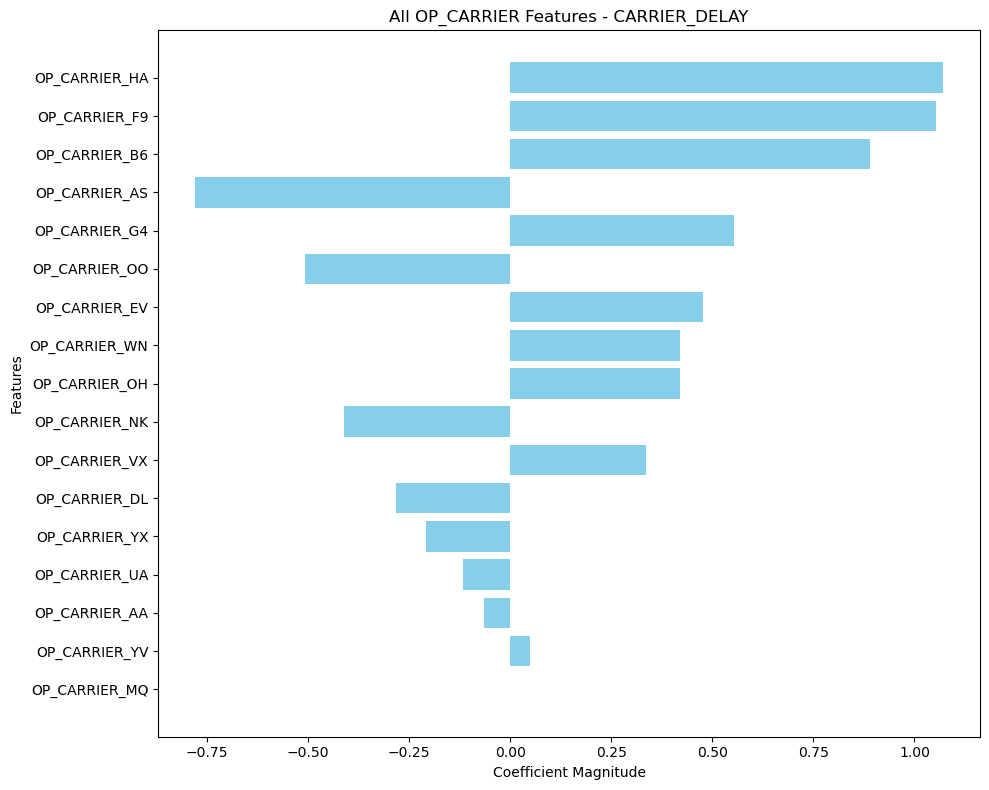

In [ ]:
import matplotlib.pyplot as plt

# Get feature names and coefficients
feature_names = X.columns
coefficients = model.coef_[0]

# Create a DataFrame for better manipulation
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])

# Filter features that start with "OP_CARRIER"
op_carrier_features = feature_importance_df[feature_importance_df['Feature'].str.startswith('OP_CARRIER')]

# Sort features by absolute coefficient value
op_carrier_features = op_carrier_features.sort_values(by='Abs_Coefficient', ascending=False)

# Truncate feature names for better display
truncated_feature_names = [name[:20] + '...' if len(name) > 20 else name for name in op_carrier_features['Feature']]

# Create the plot
plt.figure(figsize=(10, 8))
plt.barh(truncated_feature_names, op_carrier_features['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.title('All OP_CARRIER Features - CARRIER_DELAY')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

The feature importance plot indicates which carriers are most and least associated with delays according to the model's coefficients. Carriers with positive coefficient magnitudes are more strongly associated with delays, while those with negative coefficients are less associated with delays. Carrier HA, F9 and B6 (carrier IATA codes) are most likely to be faced with a carrier delay while Carrier AS is least likely to be faced with a carrier delay. Carrier MQ faces no carrier delay.

### NAS Delay

In [ ]:
#Logistic Regression for NAS DELAY:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#plane_df['CARRIER_DELAY'] = plane_df['CARRIER_DELAY'].apply(lambda x: 1 if (x != '' and float(x) > 0) else 0)
plane_df['NAS_DELAY'] = plane_df['NAS_DELAY'].apply(lambda x: 1 if (x != '' and float(x) > 0) else 0)

#Randomly sample 100000 rows
plane_df_subset2 = plane_df.sample(n=100000, random_state=42)

undelayed_flights = plane_df_subset2[plane_df_subset2['NAS_DELAY'] == 0].sample(n=10000, random_state=42)
delayed_flights = plane_df_subset2[plane_df_subset2['NAS_DELAY'] == 1].sample(n=10000, replace = True, random_state=42)

plane_df_subset = pd.concat([undelayed_flights, delayed_flights])

# Feature matrix
features_to_include = ['OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE']
X = plane_df_subset[features_to_include]

# Target matrix
y = plane_df_subset[['NAS_DELAY']]

categorical_cols = ['OP_CARRIER', 'ORIGIN', 'DEST']

# Encode categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scaling numerical features
from sklearn.preprocessing import StandardScaler

# Specify numerical columns
numerical_cols = ['CRS_DEP_TIME',  'CRS_ARR_TIME', 'DISTANCE']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features and replace them in X
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Fit logistic Regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
#print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

C:\Users\kperc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.60775
Confusion Matrix:
[[1198  821]
 [ 748 1233]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.59      0.60      2019
           1       0.60      0.62      0.61      1981

    accuracy                           0.61      4000
   macro avg       0.61      0.61      0.61      4000
weighted avg       0.61      0.61      0.61      4000



### Analysis

- Model correctly predicts NAS delays (TP and TN) 61% of the time.
- True negatives (correctly predicted no delay): 1198
- False positives (predicted delay when there was none): 821
- False negatives (predicted no delay when there was one): 748
- True positives (correctly predicted delay): 1233
- Precision for class 0 is slightly higher than for class 1, suggesting the model is slightly better at predicting flights that won't have NAS delays over those that will.
- Recall is also relatively balanced, indicating the model is equally good at identifying both true positives and true negatives.
- The F1-scores are quite close for both classes, reflecting the model's balance.

### Feature Importance for NAS Delay

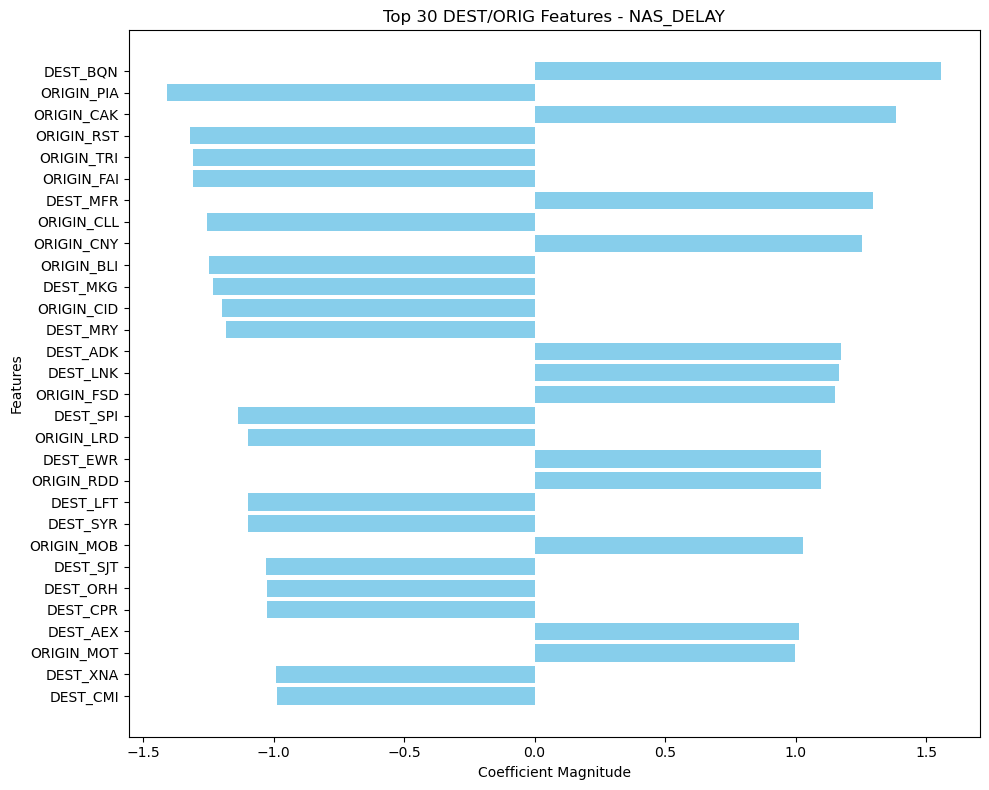

In [ ]:
import matplotlib.pyplot as plt

# Get feature names and coefficients
feature_names = X.columns
coefficients = model.coef_[0]

# Create a DataFrame for better manipulation
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])

# Filter features that start with "DEST" or "ORIG"
dest_orig_features = feature_importance_df[feature_importance_df['Feature'].str.startswith(('DEST', 'ORIG'))]

# Sort features by absolute coefficient value
dest_orig_features = dest_orig_features.sort_values(by='Abs_Coefficient', ascending=False)

# Select only the top 30 features
top_30_dest_orig_features = dest_orig_features.head(30)

# Truncate feature names for better display
truncated_feature_names = [name[:20] + '...' if len(name) > 20 else name for name in top_30_dest_orig_features['Feature']]

# Create the plot
plt.figure(figsize=(10, 8))
plt.barh(truncated_feature_names, top_30_dest_orig_features['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Top 30 DEST/ORIG Features - NAS_DELAY')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


The feature importance plot indicates how strongly each feature is associated with NAS delays. Features with positive values increase the likelihood of a flight being predicted as delayed due to NAS issues, while negative values decrease this likelihood. Airports with higher magnitude coefficients are more significant for predicting NAS delays. According to the plot, airplanes going to Flamingo International Airport are most likely to experience NAS delay, while airport leaving Downing Peoria International Airport are least likely to face NAS delay.

### Security Delay

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

plane_df['SECURITY_DELAY'] = plane_df['SECURITY_DELAY'].apply(lambda x: 1 if (x != '' and float(x) > 0) else 0)
#plane_df['NAS_DELAY'] = plane_df['NAS_DELAY'].apply(lambda x: 1 if (x != '' and float(x) > 0) else 0)

#Randomly sample 100000 rows
plane_df_subset2 = plane_df.sample(n=100000, random_state=42)

undelayed_flights = plane_df_subset2[plane_df_subset2['SECURITY_DELAY'] == 0].sample(n=10000, random_state=42)
delayed_flights = plane_df_subset2[plane_df_subset2['SECURITY_DELAY'] == 1].sample(n=10000, replace = True, random_state=42)

plane_df_subset = pd.concat([undelayed_flights, delayed_flights])

# Feature matrix
features_to_include = ['OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE']
X = plane_df_subset[features_to_include]

# Target matrix
y = plane_df_subset[['SECURITY_DELAY']]

categorical_cols = ['OP_CARRIER', 'ORIGIN', 'DEST']

# Encode categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scaling numerical features
from sklearn.preprocessing import StandardScaler

# Specify numerical columns
numerical_cols = ['CRS_DEP_TIME',  'CRS_ARR_TIME', 'DISTANCE']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features and replace them in X
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Fit logistic Regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
#print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

#END OF LOGISTIC REGRESSION FOR SECURITY DELAY

C:\Users\kperc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.934
Confusion Matrix:
[[1755  264]
 [   0 1981]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      2019
           1       0.88      1.00      0.94      1981

    accuracy                           0.93      4000
   macro avg       0.94      0.93      0.93      4000
weighted avg       0.94      0.93      0.93      4000



### Analysis

- Model correctly predicts security delays (TP and TN) 93% of the time.
- Precision for class 0 (no security delay) is perfect (1.00).
- The performance metric suggest the model may be over-fitted.

### Late Aircraft Delay

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

plane_df['LATE_AIRCRAFT_DELAY'] = plane_df['LATE_AIRCRAFT_DELAY'].apply(lambda x: 1 if (x != '' and float(x) > 0) else 0)
#plane_df['NAS_DELAY'] = plane_df['NAS_DELAY'].apply(lambda x: 1 if (x != '' and float(x) > 0) else 0)

#Randomly sample 100000 rows
plane_df_subset2 = plane_df.sample(n=100000, random_state=42)

undelayed_flights = plane_df_subset2[plane_df_subset2['LATE_AIRCRAFT_DELAY'] == 0].sample(n=10000, random_state=42)
delayed_flights = plane_df_subset2[plane_df_subset2['LATE_AIRCRAFT_DELAY'] == 1].sample(n=10000, replace = True, random_state=42)

plane_df_subset = pd.concat([undelayed_flights, delayed_flights])

# Feature matrix
features_to_include = ['OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE']
X = plane_df_subset[features_to_include]

# Target matrix
y = plane_df_subset[['LATE_AIRCRAFT_DELAY']]

categorical_cols = ['OP_CARRIER', 'ORIGIN', 'DEST']

# Encode categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scaling numerical features
from sklearn.preprocessing import StandardScaler

# Specify numerical columns
numerical_cols = ['CRS_DEP_TIME',  'CRS_ARR_TIME', 'DISTANCE']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features and replace them in X
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Fit logistic Regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
#print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

#END OF LOGISTIC REGRESSION FOR LATE AIRCRAFT DELAY

C:\Users\kperc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.655
Confusion Matrix:
[[1252  767]
 [ 613 1368]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.62      0.64      2019
           1       0.64      0.69      0.66      1981

    accuracy                           0.66      4000
   macro avg       0.66      0.66      0.65      4000
weighted avg       0.66      0.66      0.65      4000



### Analysis

- Model correctly predicts weather delays (TP and TN) 66% of the time.
- True negatives (correctly predicted no delay): 1,253
- False positives (predicted delay when there was none): 776
- False negatives (predicted no delay when there was one): 612
- True positives (correctly predicted delay): 1,369
- Precision for class 0 (no delay) is 0.67, indicating that when the model predicts no delay, it is correct about two-thirds of the time.
- Recall for class 0 is 0.62, which means the model correctly identifies 62% of the actual no-delay cases.
- The F1-scores, which consider both precision and recall, are 0.65 for class 0 and 0.67 for class 1, suggesting moderate model performance.

## Conclusion

Logistic regression can be used to predict flight delays with varying degrees of success. The accuracy levels suggest that there is room for improvement. The prediction of weather delays is the most accurate, which may be due to the more predictable nature of weather patterns as opposed to the complexities of carrier operations or NAS issues. Each type of delay has specific features that are strong predictors, such as particular carriers or airports. This means that delay causes are not uniform and are influenced by features that are unique to each type of delay.